In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline


In [3]:
sub_format = pd.read_csv('data/submission_format.csv') 
sub_format

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7
...,...,...,...
26703,53410,0.5,0.7
26704,53411,0.5,0.7
26705,53412,0.5,0.7
26706,53413,0.5,0.7


In [4]:
tr_features = pd.read_csv('data/training_set_features.csv')

In [5]:
tr_labels =pd.read_csv('data/training_set_labels.csv')
tr_labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [6]:
te_features=pd.read_csv('data/test_set_features.csv')

In [7]:
tr_features.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [8]:
tr_features.education.value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64

In [9]:
tr_features.age_group.value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

In [10]:
len(tr_features.count())

36

In [11]:
len(tr_features)

26707

In [12]:
(tr_features.isna().sum())/len(tr_features)

respondent_id                  0.000000
h1n1_concern                   0.003445
h1n1_knowledge                 0.004343
behavioral_antiviral_meds      0.002658
behavioral_avoidance           0.007788
behavioral_face_mask           0.000711
behavioral_wash_hands          0.001573
behavioral_large_gatherings    0.003258
behavioral_outside_home        0.003070
behavioral_touch_face          0.004793
doctor_recc_h1n1               0.080878
doctor_recc_seasonal           0.080878
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
health_insurance               0.459580
opinion_h1n1_vacc_effective    0.014640
opinion_h1n1_risk              0.014528
opinion_h1n1_sick_from_vacc    0.014790
opinion_seas_vacc_effective    0.017299
opinion_seas_risk              0.019246
opinion_seas_sick_from_vacc    0.020107
age_group                      0.000000
education                      0.052683
race                           0.000000


In [13]:
tr_features.health_insurance.value_counts()

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

In [14]:
tr_features['health_insurance']=tr_features['health_insurance'].fillna(value=0).value_counts() #can be ohe

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64

In [ ]:
#tr_education['education']=
#should i fill in with some value?

<AxesSubplot:>

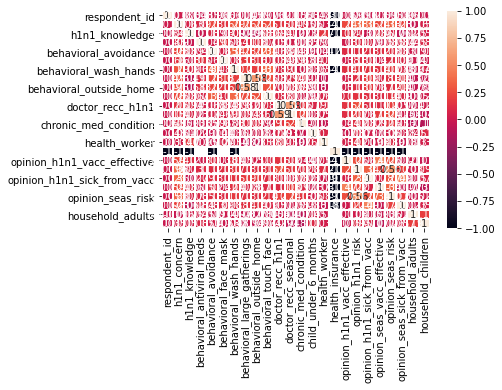

In [65]:
sns.heatmap(tr_features.corr(),linewidths=1,annot=True)

In [70]:
join_df=tr_features.join(tr_labels,on='respondent_id',lsuffix='x')

In [68]:
tr_features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [69]:
tr_labels.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

<AxesSubplot:>

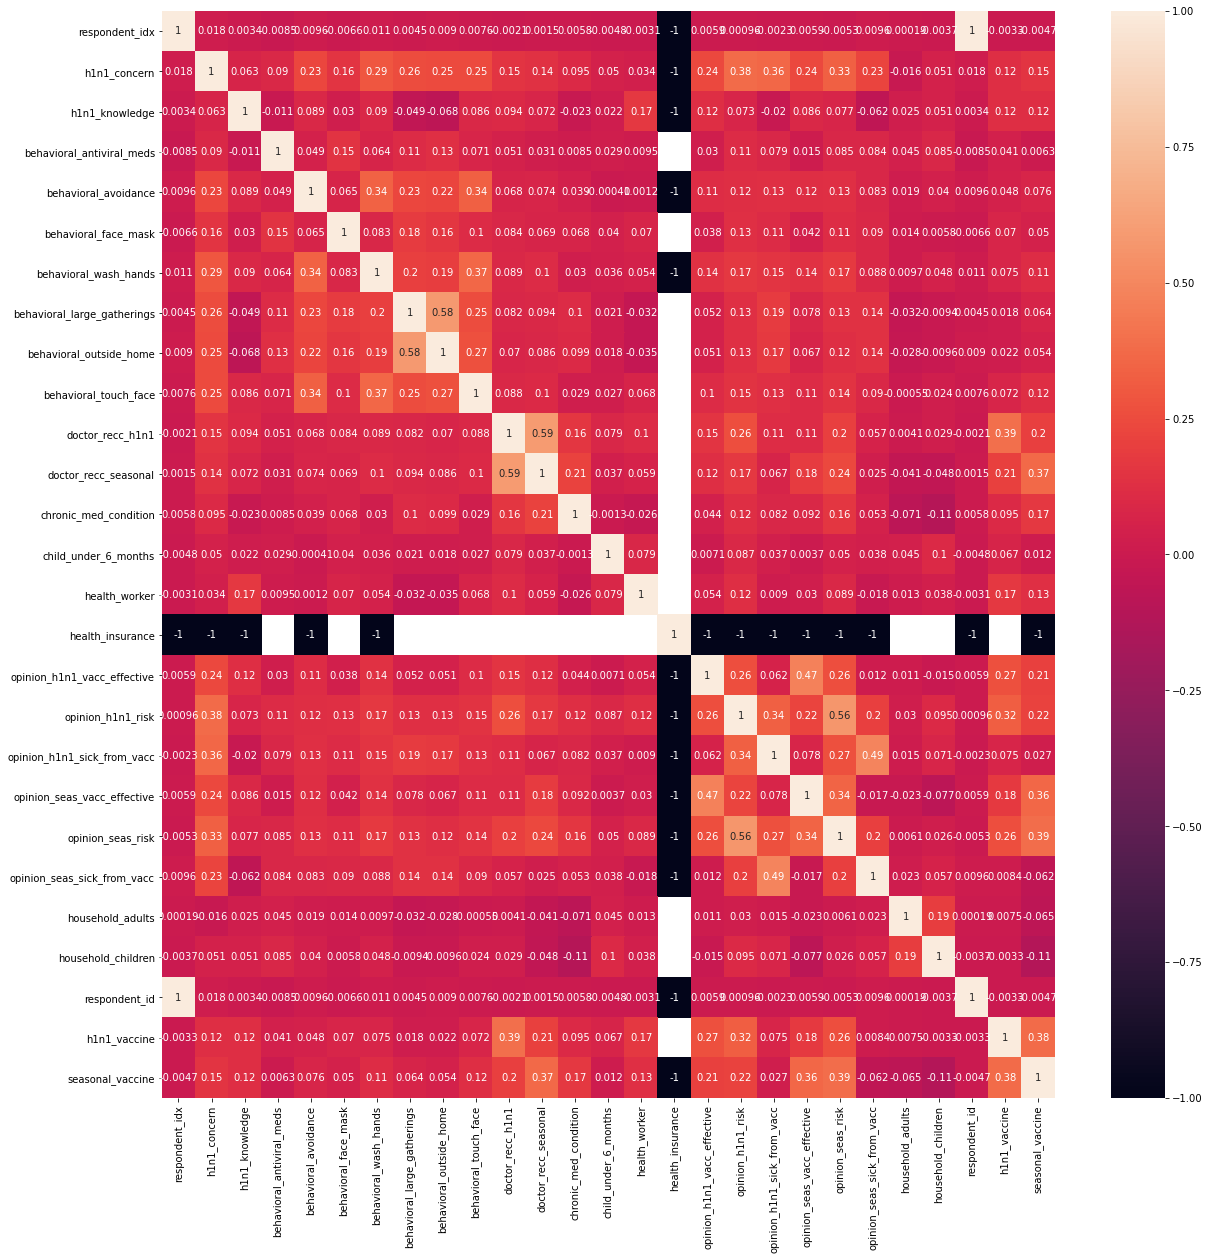

In [72]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(join_df.corr(),annot=True,ax=ax)

In [51]:
tr_features.race.value_counts()#can be ohe

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [52]:
tr_features.income_poverty.value_counts()#needs a function

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

In [53]:
tr_features.marital_status.value_counts()#maybe drop

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

In [ ]:
"""rent_or_own                    0.076459
employment_status              0.054780
hhs_geo_region                 0.000000
census_msa                     0.000000
household_adults               0.009323
household_children             0.009323
employment_industry            0.499120
employment_occupation          0.504362"""

In [54]:
tr_features.rent_or_own.value_counts()

Own     18736
Rent     5929
Name: rent_or_own, dtype: int64

In [55]:
tr_features.employment_status.value_counts()

Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64

In [56]:
tr_features.hhs_geo_region.value_counts()

lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64

In [57]:
tr_features.census_msa.value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

In [58]:
tr_features.household_children.value_counts()

0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: household_children, dtype: int64

In [59]:
tr_features.household_adults.value_counts()

1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: household_adults, dtype: int64

In [60]:
tr_features.employment_industry.value_counts()#thinking about dropping 

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: employment_industry, dtype: int64

In [61]:
tr_features.employment_occupation.value_counts()#thinking about dropping

xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: employment_occupation, dtype: int64

In [47]:
tr_labels.value_counts()

respondent_id  h1n1_vaccine  seasonal_vaccine
26706          0             0                   1
8970           1             1                   1
8894           0             1                   1
8895           0             0                   1
8896           0             0                   1
                                                ..
17808          0             1                   1
17809          0             0                   1
17810          1             1                   1
17811          0             0                   1
0              0             0                   1
Length: 26707, dtype: int64

In [48]:
X_train, X_eval, y_train, y_eval = train_test_split(
    tr_features,
    tr_labels['h1n1_vaccine'],
    test_size=0.33,
    shuffle=True,
    stratify=tr_labels['h1n1_vaccine']
)

In [ ]:
#instantiate Dummy Classifier ()

In [ ]:
pipe = Pipeline (steps =[('ohe',OneHotEncoder()),
                        ('ss',Standard)])

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

class RemoveNaTransformer(TransformerMixin):
    
    def __init__(self):
        super().__init__()
        
    def fit(self, *args, **kwargs):
        return "passthrough"
    
    
    def fit_transform(self, *args, **kwargs):
        return self.transform(*args, **kwargs)
    
    def transform(self, X, y=None, **fit_params):
        
        print(X)
        return X

In [18]:
GrabNumeric = FunctionTransformer(lambda df: df.select_dtypes(include=['float', 'int']))

In [19]:
GrabObject = FunctionTransformer(lambda df: df.select_dtypes(include=['object']))

In [20]:
def ohe(df):
    cols = df.select_dtypes(include=['object']).columns
    temp_df = df
    for col in cols:
        encoder = OneHotEncoder(handle_unknown="ignore")
        fitted_arr = encoder.fit_transform(temp_df[[col]]).toarray()
        col_names = [f"{col}_{f}" for f in encoder.get_feature_names_out()]
        encoded_values = pd.DataFrame(fitted_arr, columns=col_names)
        temp_df = temp_df.join(encoded_values)
    return temp_df
OneHotEncoderWithColNames = FunctionTransformer(ohe)

In [21]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

subpipe_num = Pipeline(steps=[('Grab_numeric',GrabNumeric),
                              ('num_impute', SimpleImputer()),
                              ('ss', StandardScaler())])


subpipe_cat = Pipeline(steps=[# ('Grab_object',GrabObject),
                              # ('cat_impute', SimpleImputer(strategy='most_frequent')),
                              ('ohe', OneHotEncoderWithColNames)])


In [22]:
ct = ColumnTransformer(transformers = [
    ('subpipe_num', subpipe_num, tr_features.columns),
   #  ('subpipe_cat', subpipe_cat, tr_features.columns)
])

In [23]:
ct.fit(tr_features)
array = ct.transform(tr_features)

In [24]:
subpipe_cat.transform(tr_features)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_employment_occupation_rcertsgn,employment_occupation_employment_occupation_tfqavkke,employment_occupation_employment_occupation_ukymxvdu,employment_occupation_employment_occupation_uqqtjvyb,employment_occupation_employment_occupation_vlluhbov,employment_occupation_employment_occupation_xgwztkwe,employment_occupation_employment_occupation_xqwwgdyp,employment_occupation_employment_occupation_xtkaffoo,employment_occupation_employment_occupation_xzmlyyjv,employment_occupation_employment_occupation_nan
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
pd.DataFrame(array)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.731986,-0.680609,-2.046928,-0.226911,-1.632555,-0.272298,-2.177583,-0.749009,1.403796,0.691971,...,-0.360462,115.557345,-0.850610,-1.052050,-0.264426,-1.880954,-1.253366,-0.089516,-1.182177,-0.578667
1,-1.731856,1.520279,1.195647,-0.226911,0.617345,-0.272298,0.459948,-0.749009,1.403796,0.691971,...,-0.360462,-115.557345,1.149360,1.298784,1.214180,-0.024126,-0.524309,1.426260,-1.182177,-0.578667
2,-1.731727,-0.680609,-0.425641,-0.226911,0.617345,-0.272298,-2.177583,-0.749009,-0.714548,-1.452107,...,-0.360462,0.000000,-0.850610,-1.052050,-1.003729,-0.024126,-1.253366,-0.089516,1.484891,-0.578667
3,-1.731597,-0.680609,-0.425641,-0.226911,0.617345,-0.272298,0.459948,1.339461,-0.714548,-1.452107,...,-0.360462,0.000000,-0.850610,0.515173,1.953484,0.904289,0.933803,-0.847404,-1.182177,-0.578667
4,-1.731467,0.419835,-0.425641,-0.226911,0.617345,-0.272298,0.459948,1.339461,-0.714548,0.691971,...,-0.360462,0.000000,-0.850610,0.515173,-0.264426,-0.952540,-1.253366,1.426260,0.151357,-0.578667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,1.731467,0.419835,-2.046928,-0.226911,0.617345,-0.272298,-2.177583,-0.749009,1.403796,-1.452107,...,-0.360462,0.000000,-0.850610,-1.052050,-1.003729,0.904289,-0.524309,-0.089516,-1.182177,-0.578667
26703,1.731597,-0.680609,1.195647,-0.226911,0.617345,-0.272298,0.459948,-0.749009,-0.714548,-1.452107,...,2.860323,0.000000,0.149375,-0.268439,-0.264426,0.904289,-1.253366,-0.847404,0.151357,-0.578667
26704,1.731727,0.419835,1.195647,-0.226911,0.617345,3.675062,0.459948,1.339461,-0.714548,0.691971,...,-0.360462,0.000000,0.149375,1.298784,-0.264426,0.904289,0.933803,-0.089516,-1.182177,-0.578667
26705,1.731856,-0.680609,-0.425641,-0.226911,-1.632555,-0.272298,-2.177583,-0.749009,-0.714548,0.000000,...,-0.360462,0.000000,-0.850610,-1.052050,-0.264426,-1.880954,-1.253366,-0.089516,0.151357,-0.578667


In [26]:
tr_features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [28]:
df=tr_features.join(tr_labels.set_index('respondent_id'),on='respondent_id')

In [34]:
df.h1n1_vaccine

0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

In [39]:
X=df.drop('h1n1_vaccine',axis=1)
y=df.h1n1_vaccine